<a href="https://colab.research.google.com/github/tripatheea/transform/blob/main/without_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install tensorflow-probability

# # to generate gifs
# ! pip install imageio
# ! pip install git+https://github.com/tensorflow/docs

In [ ]:
# from IPython import display

from scipy import interpolate
# import glob
# import imageio
import matplotlib.pyplot as plt
import numpy as np
# import PIL
import tensorflow as tf
# import tensorflow_probability as tfp
# import time

# from tensorflow.python.framework.ops import disable_eager_execution, enable_eager_execution

In [ ]:
# import keras
# from keras import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Reshape, Dense, Lambda, Flatten
# from keras import backend as K

# import warnings
# warnings.filterwarnings('ignore')
import numpy as np
# import glob
# import skimage
# import skimage.transform
# import skimage.io
# import PIL
import numpy as np
# import os
# from IPython.display import clear_output
# import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# import imageio
# import utils

from sklearn.metrics import roc_curve


In [ ]:
# ! pip install corner

In [ ]:
# import corner

In [ ]:
# enable_eager_execution()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time
from tensorflow.keras import regularizers
import tensorflow.keras.initializers



In [ ]:
depth = 1

data = np.load(f'depth_{depth}_injs.npz')

In [ ]:
x, y = data['x'], data['y']

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 1.])

In [ ]:
x.shape, y.shape

((2500, 10, 47, 4), (2500,))

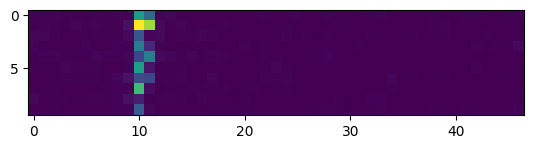

In [ ]:
idx = 0

plt.imshow(x[idx,:,:,0]**2 + x[idx,:,:,1]**2)

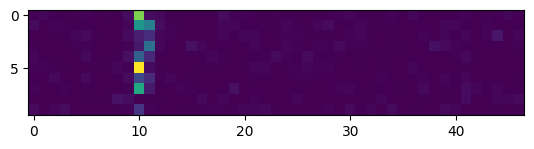

In [ ]:
plt.imshow(x[idx,:,:,2]**2 + x[idx,:,:,3]**2)

In [ ]:
# x

In [ ]:
x.shape

(2500, 10, 47, 4)

In [ ]:
# x = np.transpose(x, (0, 2, 3, 1))

In [ ]:
from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import normalize
# 
# scaled_x_s = np.array(x)

scaled_x_s = x
scaled_x_s.shape

(2500, 10, 47, 4)

In [ ]:
shuffle = False

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=shuffle)
x_test_s, x_val_s, y_test_s, y_val_s = train_test_split(x_test_s, y_test_s, test_size=0.5, random_state=26, shuffle=shuffle)

x_train_s.shape, x_val_s.shape, x_test_s.shape

((1875, 10, 47, 4), (313, 10, 47, 4), (312, 10, 47, 4))

In [ ]:
y_train_s[:5], x_train_s[0,:,:,0].T.shape

(array([1., 1., 1., 1., 1.]), (47, 10))

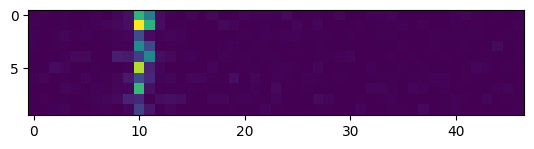

In [ ]:
plt.imshow(x_train_s[1,:,:,0]**2 + x_train_s[1,:,:,1]**2)

In [ ]:
# x_train_s = np.expand_dims(x_train_s, -1)
# x_test_s = np.expand_dims(x_test_s, -1)
# x_val_s = np.expand_dims(x_val_s, -1)

# y_train_s = np.expand_dims(y_train_s, -1)
# y_test_s = np.expand_dims(y_test_s, -1)
# y_val_s = np.expand_dims(y_val_s, -1)

x_train_s.shape

(1875, 10, 47, 4)

In [ ]:
# def convert_to_tensor_utility(x):
#     return tf.convert_to_tensor(x, dtype=tf.float32)

 
# x_train_s, y_train_s, x_test_s, y_test_s, x_val_s, y_val_s = tuple(map(convert_to_tensor_utility, [x_train_s, y_train_s, x_test_s, y_test_s, x_val_s, y_val_s]))

In [ ]:
x_train_s.shape, y_train_s.shape

((1875, 10, 47, 4), (1875,))

In [ ]:
y_train_s.shape, y_test_s.shape, y_val_s.shape

((1875,), (312,), (313,))

In [ ]:
batch_size = 64

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_s, y_train_s)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_s, y_test_s)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_s, y_val_s)).batch(batch_size)

In [ ]:
x_train_s.shape, x_train_s.shape[2]

((1875, 10, 47, 4), 47)

In [ ]:
y_train_s[:4]

array([1., 1., 1., 1.])

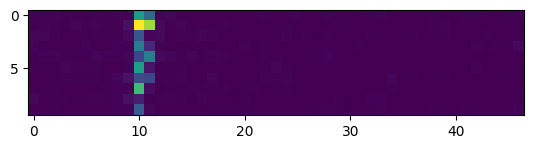

In [ ]:
plt.imshow(np.abs(x_train_s[0,:,:,0]**2 + x_train_s[0,:,:,1]**2))

In [ ]:
# x_vals_s.shape, y_val_s.shape

NameError: ignored

In [ ]:
def get_p_det_metric(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    return np.interp(0.01, fpr, tpr)
    

In [ ]:
def p_det_metric(y_true, y_pred): 
    return tf.numpy_function(get_p_det_metric, (y_true, y_pred), tf.double)


# interpolate.interp1d(fpr, tpr)(0.01)

In [ ]:
class RocCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_val, y_val):
        # self.x = training_data[0]
        # self.y = training_data[1]
        # self.x_val = validation_data[0]
        # self.y_val = validation_data[1]

        self.x_val = x_val
        self.y_val = y_val


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        
        y_pred = tf_model.predict(self.x_val, batch_size=len(self.y_val))


        fpr, tpr, thresholds = roc_curve(self.y_val, y_pred)

       
        print( "p_det @ 1% false alarm rate is ", interpolate.interp1d(fpr, tpr)(0.01) )
        
        # print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

roc = RocCallback(x_val_s, y_val_s)

In [ ]:
# Define the model.

# act = tf.keras.layers.LeakyReLU(alpha=0.01)
act = 'relu'

reg = tf.keras.regularizers.L2(
    l2=0.01)

input = tf.keras.Input(shape=(x_train_s.shape[1], x_train_s.shape[2], x_train_s.shape[3],))
x_layer = tf.keras.layers.Conv1D(32, (30), strides=4, kernel_regularizer=reg, activation=act, kernel_initializer='he_normal')(input)
x_layer = tf.keras.layers.Conv2D(32, (2, 4), kernel_regularizer=reg, strides=(1, 2), activation=act, kernel_initializer='he_normal')(x_layer)
x_layer = tf.keras.layers.Flatten()(x_layer)
# x = tf.keras.layers.Dense(16, activation=act)(x)
# x_layer = tf.keras.layers.Dense(16, activation=act, kernel_regularizer=reg)(x_layer)
x_layer = tf.keras.layers.Dense(8, activation=act, kernel_regularizer=reg)(x_layer)
x_layer = tf.keras.layers.Dense(4, activation=act, kernel_regularizer=reg)(x_layer)
x_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x_layer)

In [ ]:
tf_model = tf.keras.Model(inputs=input, outputs=x_layer)

In [ ]:
tf_model.compile(
                optimizer='adam',
                 loss='binary_crossentropy',
              metrics=['accuracy', p_det_metric],
                )

In [ ]:
tf_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 10, 47, 4)]       0         
                                                                 
 conv1d_11 (Conv1D)          (None, 10, 5, 32)         3872      
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 1, 32)          8224      
                                                                 
 flatten_11 (Flatten)        (None, 288)               0         
                                                                 
 dense_33 (Dense)            (None, 8)                 2312      
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 1)                 5  

In [ ]:
EPOCHS = 25

# history = tf_model.fit(x_train_s, y_train_s, epochs=EPOCHS)

# , validation_data=(x_val_s, y_val_s)
history = tf_model.fit(train_dataset, epochs=EPOCHS, validation_data=(val_dataset), callbacks=[roc])

# 

Epoch 1/25
[0. 0. 0. 1.] [0.         0.02777778 1.         1.        ]
 1/30 [>.............................] - ETA: 0s - loss: 1.1086 - accuracy: 1.0000 - p_det_metric: 1.0000[0. 0. 0. 1.] [0.         0.03846154 1.         1.        ]
[0. 0. 0. 1.] [0.         0.05882353 1.         1.        ]
[0. 0. 0. 1.] [0.         0.08571429 1.         1.        ]
[0. 0. 0. 1.] [0.         0.03333333 1.         1.        ]
 5/30 [====>.........................] - ETA: 0s - loss: 1.1035 - accuracy: 0.9937 - p_det_metric: 1.0000[0. 0. 0. 1.] [0.         0.05555556 1.         1.        ]
[0. 0. 0. 1.] [0.     0.0625 1.     1.    ]
[0. 0. 0. 1.] [0.         0.02272727 1.         1.        ]
[0. 0. 0. 1.] [0.         0.12903226 1.         1.        ]
[0. 0. 0. 1.] [0.         0.02777778 1.         1.        ]
10/30 [=========>....................] - ETA: 0s - loss: 1.0741 - accuracy: 0.9953 - p_det_metric: 1.0000[0. 0. 0. 1.] [0.         0.11428571 1.         1.        ]
[0. 0. 0. 1.] [0.         0.07

KeyboardInterrupt: ignored

In [ ]:

plt.figure(figsize=(15, 6))

plt.subplot(121)

plt.plot(np.arange(0, EPOCHS), history.history['loss'], label="Training Loss", marker="x", ms=3)
plt.plot(np.arange(0, EPOCHS), history.history['val_loss'], label="Validation Loss", marker="x", ms=3)

plt.legend()

plt.subplot(122)

metric = 'p_det_metric'

plt.plot(np.arange(0, EPOCHS), history.history[metric], label="Training pdet", marker="x", ms=3)
plt.plot(np.arange(0, EPOCHS), history.history['val_' + metric], label="Validation pdet", marker="x", ms=3)

plt.ylim(0, 1)

plt.legend()

In [ ]:
result = tf_model.evaluate(test_dataset)

In [ ]:
test_predicted_ys = tf_model.predict(x_test_s)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_s, test_predicted_ys)

In [ ]:
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], ls="dotted", lw=0.5)

plt.grid(alpha=0.3, ls="dotted")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

In [ ]:
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], ls="dotted", lw=0.5)

plt.grid(alpha=0.3, ls="dotted")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.xlim(0, 0.1)

In [ ]:
# fpr, tpr, thresholds = metrics.roc_curve(label, probability)
interpolate.interp1d(fpr, tpr)(0.01)

In [ ]:
tpr_intrp(0.08)